<h1> Analyzing Effect of various pollution indicators on Mortality Rate </h1>
<p> In this module we analyse and visualise the effect of various pollution indicators on Mortality rate (number of deaths per hundred thousand (or <i> lakh </i>) people). <br>
Data is obtained from <a href = "https://www.kaggle.com/c/predict-impact-of-air-quality-on-death-rates/data"> Kaggle </a>. Data contains the following fields:
<ol>
<li>Ozone concentration</li>
<li>PM10 level</li>
<li>PM2.5 level</li>
<li>NO<sub>2</sub> level</li>
<li>Temperature Mean</li>
<li>Mortality Rate</li>
</ol>

</p>

<h2>Importing Dependencies</h2>
<br>
We install the following python pakcages:
    <ol>
    <li> Pandas: For reading and manipulating dataframes</li>
    <li> Numpy: For numeric computation</li>
    <li> OS: Changing, getting path</li>
    <li> Matplotlib: Plotting and visualising</li>
    <li> Itertool: Creating combinations</li>
    <li> Seaborn: Plotting and visualising</li>
    <li> scipy: Python library for statistics</li>
    </ol>

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot as plt
import itertools
from scipy import stats
%matplotlib inline

In [4]:
## change directory to the directory in which data is present
os.chdir(os.getcwd() + '\\Data')

<h2> Reading Data </h2>
<p>We read data present in comma separated value (CSV) format using Pandas library. Dataframe consists of 18,403 data points and 9 variables (or <i>features</i>). Data is stored in the pandas dataframe format
</p>


In [11]:
## reading file
train = pd.read_csv('train.csv')
train.head()
print("Number of data points =", train.shape[0], "\nNumber of Variables =", train.shape[1])

Number of data points = 18403 
Number of Variables = 9


<h2> Analysing Distribution of Variables </h2>
<p> We analyze the distribution of the variables present in the dataset by studying their distibutions, the describe method in pandas library goves the description (count, mean, standard deviation, mean, minimum, maximum, quantiles, and median of the dataset). <br> <br>
After obtaining the paratmeters, in order to visualise the distribution, we plot the histogram for different variables in the dataset
</p>

In [12]:
## drop id as it is not a feature
train.drop(['Id'], axis = 1, inplace = True)

## describe method gives the description of each of the variables in the dataframe
train.describe()

,mortality_rate,O3,PM10,PM25,NO2,T2M
count,18403.000000,18394.000000,18394.000000,15127.000000,11833.000000,18403.000000
mean,1.301737,45.325857,13.712272,7.498714,12.045813,283.002235
std,0.304161,16.221330,7.421616,5.758357,8.296675,5.182186
min,0.439000,0.988000,2.020000,0.904000,1.104000,265.562000
25%,1.102000,35.074250,8.656250,3.624000,6.056000,279.321500
50%,1.281000,45.836000,11.704500,5.636000,9.769000,283.270000
75%,1.474000,55.881000,16.589000,9.326500,15.858000,287.240500
max,2.841000,105.693000,60.627000,45.846000,76.765000,297.209000


<h2> Visualisation of Distribution </h2>
<p> We use histogram to visualise the distribution of various variables in the dataset.</p>

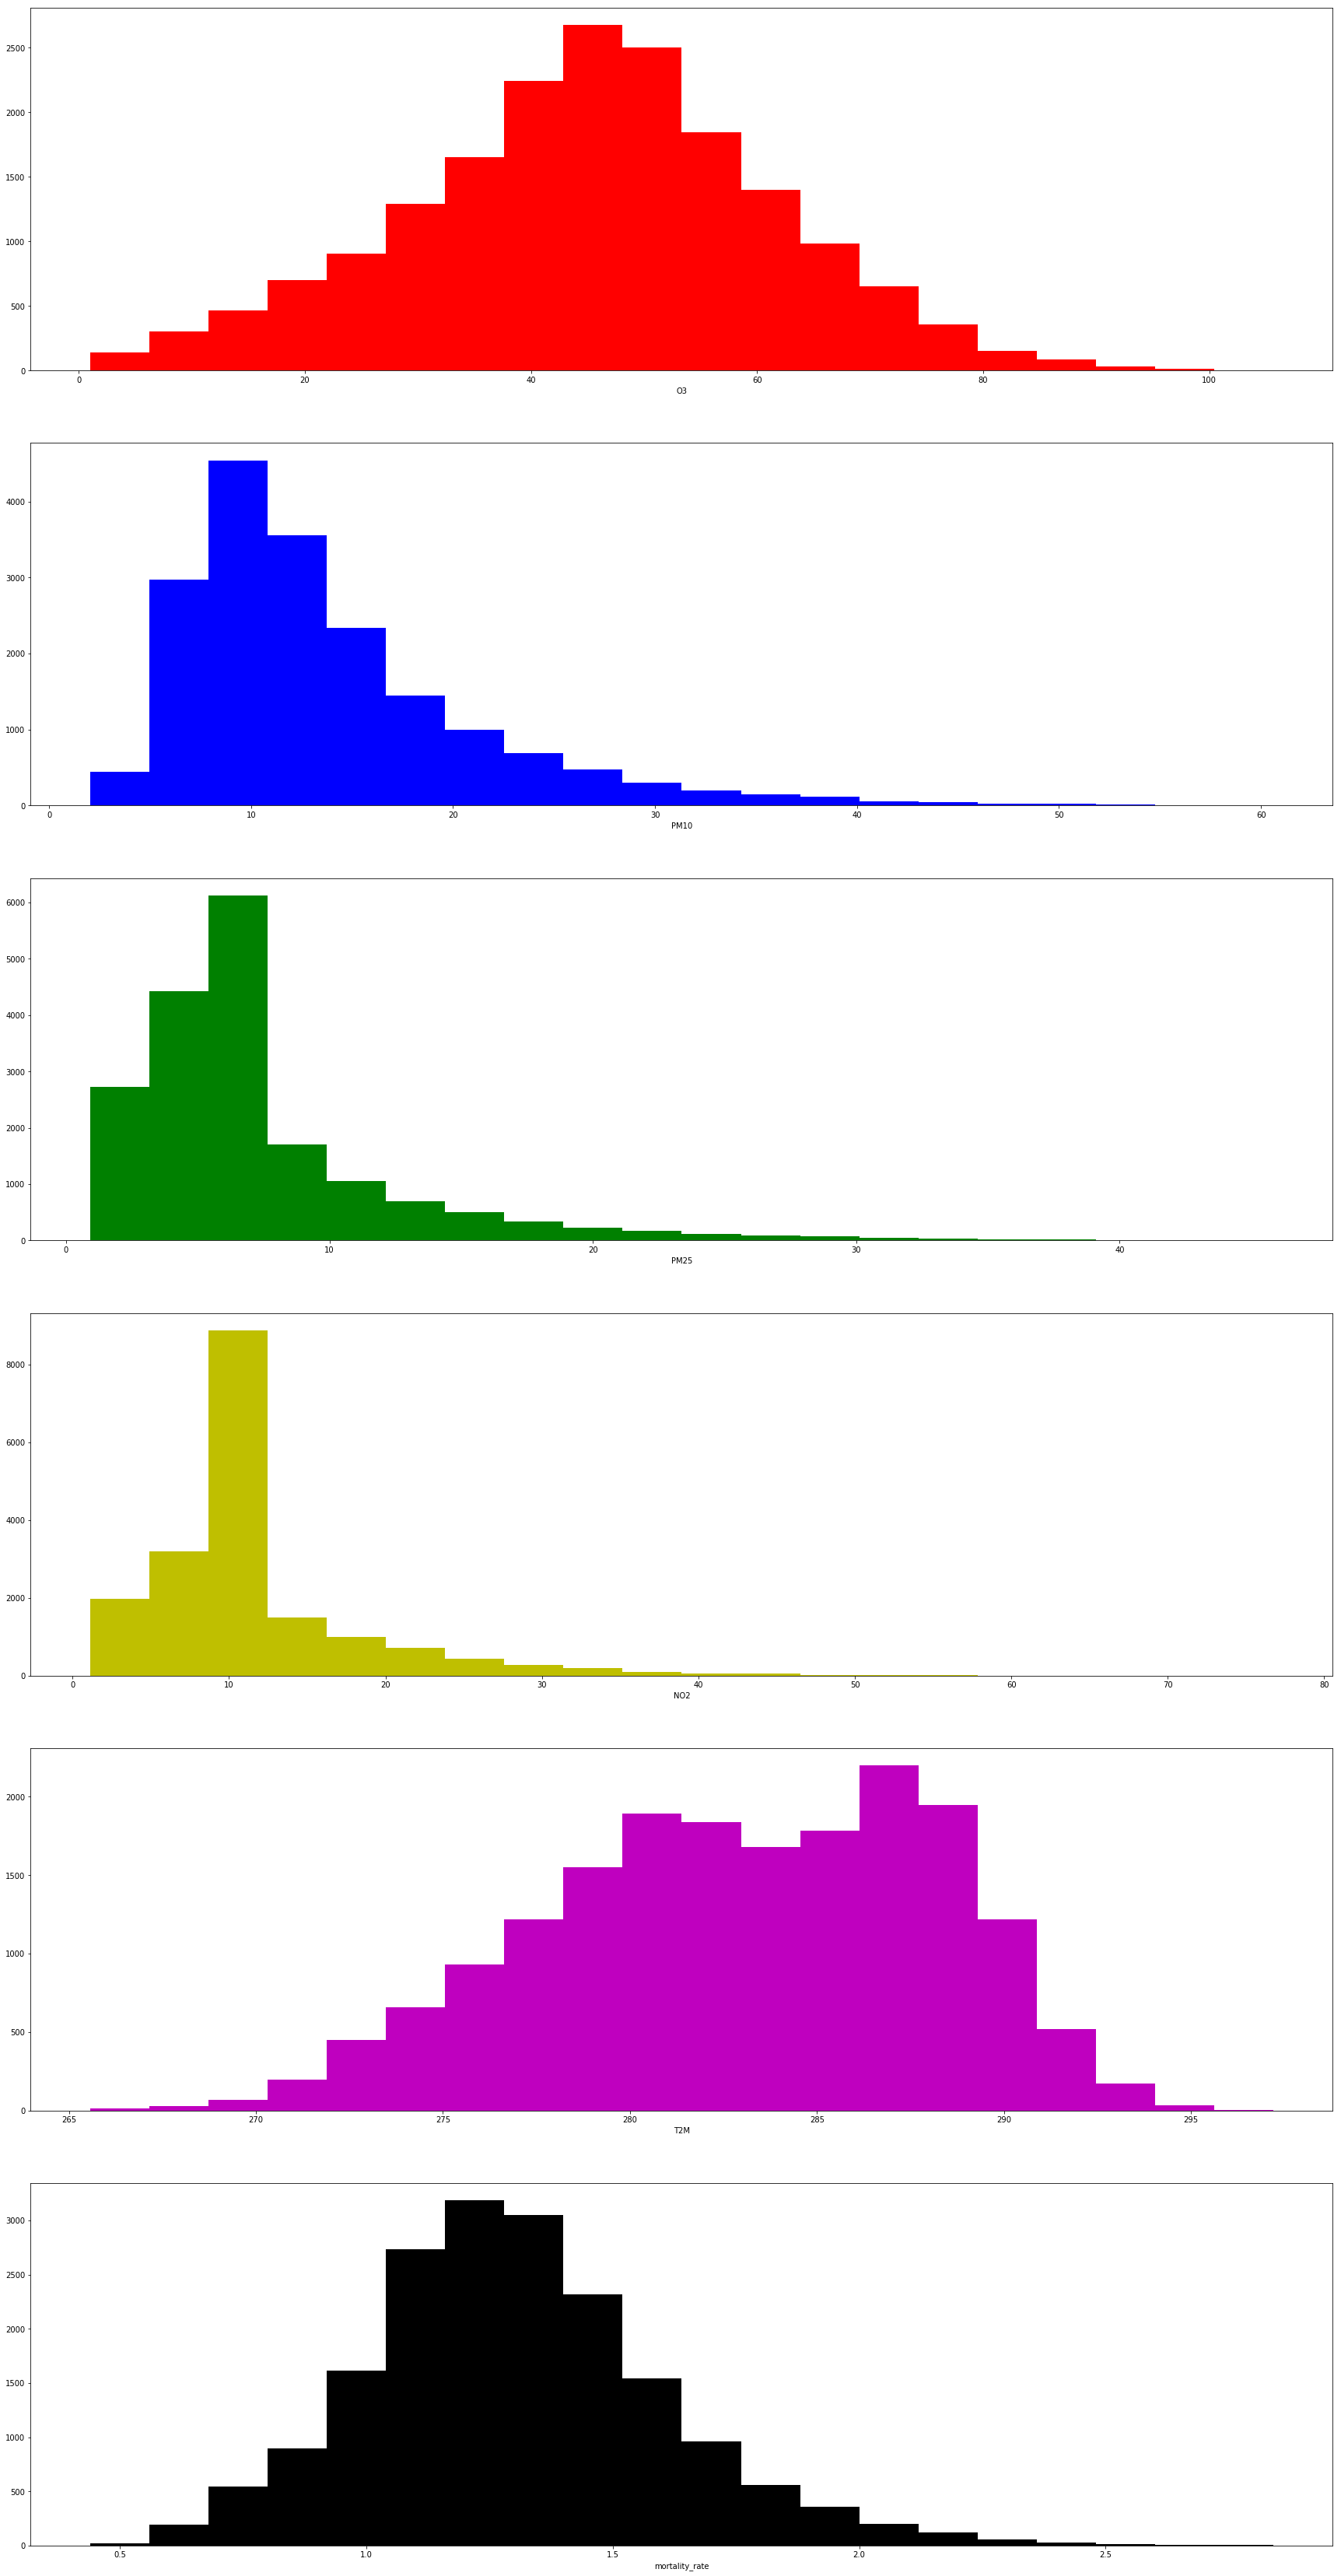

In [27]:
## variables to be analyzed
variables = ['O3', 'PM10', 'PM25', 'NO2', 'T2M','mortality_rate']

## colors for different histograms
colors = itertools.cycle(["r", "b", "g", "y", "m", "k"])

## creating plot
f = plt.figure()

f, axes = plt.subplots(nrows = 6, figsize = (30, 60))

## creating subplots
for i in range(len(variables)):
    dist = train[variables[i]].fillna(train[variables[i]].mean())
    sc = axes[i].hist(dist, bins = 20, color = next(colors))
    axes[i].set_xlabel(variables[i])

<h2> Correlation among features </h2>
<p>
To analyze correlation among the features we find the Pearson's correlation coeffecient for all pairs of variables.
</p>
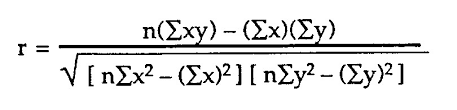
<p>
Pearson's coeffecient lies between -1 and 1, indicating positive and negative correlation, while 0 indicates no correlation.
</p>

In [47]:
train.corr()

,mortality_rate,O3,PM10,PM25,NO2,T2M
mortality_rate,1.000000,-0.060490,-0.087066,-0.075311,-0.074510,-0.488592
O3,-0.060490,1.000000,-0.221377,-0.184900,-0.680321,0.335717
PM10,-0.087066,-0.221377,1.000000,0.907125,0.600220,-0.060965
PM25,-0.075311,-0.184900,0.907125,1.000000,0.570076,-0.072937
NO2,-0.074510,-0.680321,0.600220,0.570076,1.000000,-0.340037
T2M,-0.488592,0.335717,-0.060965,-0.072937,-0.340037,1.000000


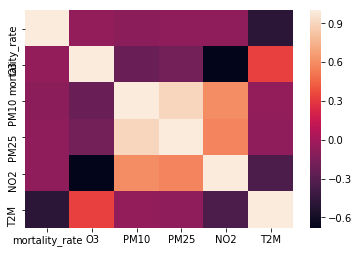

In [29]:
## heatmap of correlation
sns.heatmap(train.corr())

<h2> Visualisation of correlation among features </h2>
<p> We analyze the correlation among different features of the dataset using scatter plots. The mortality rate is plotted on Y-axis while other features are plotted on X-axis.
</p>

Text(0.5,0,'T2M')

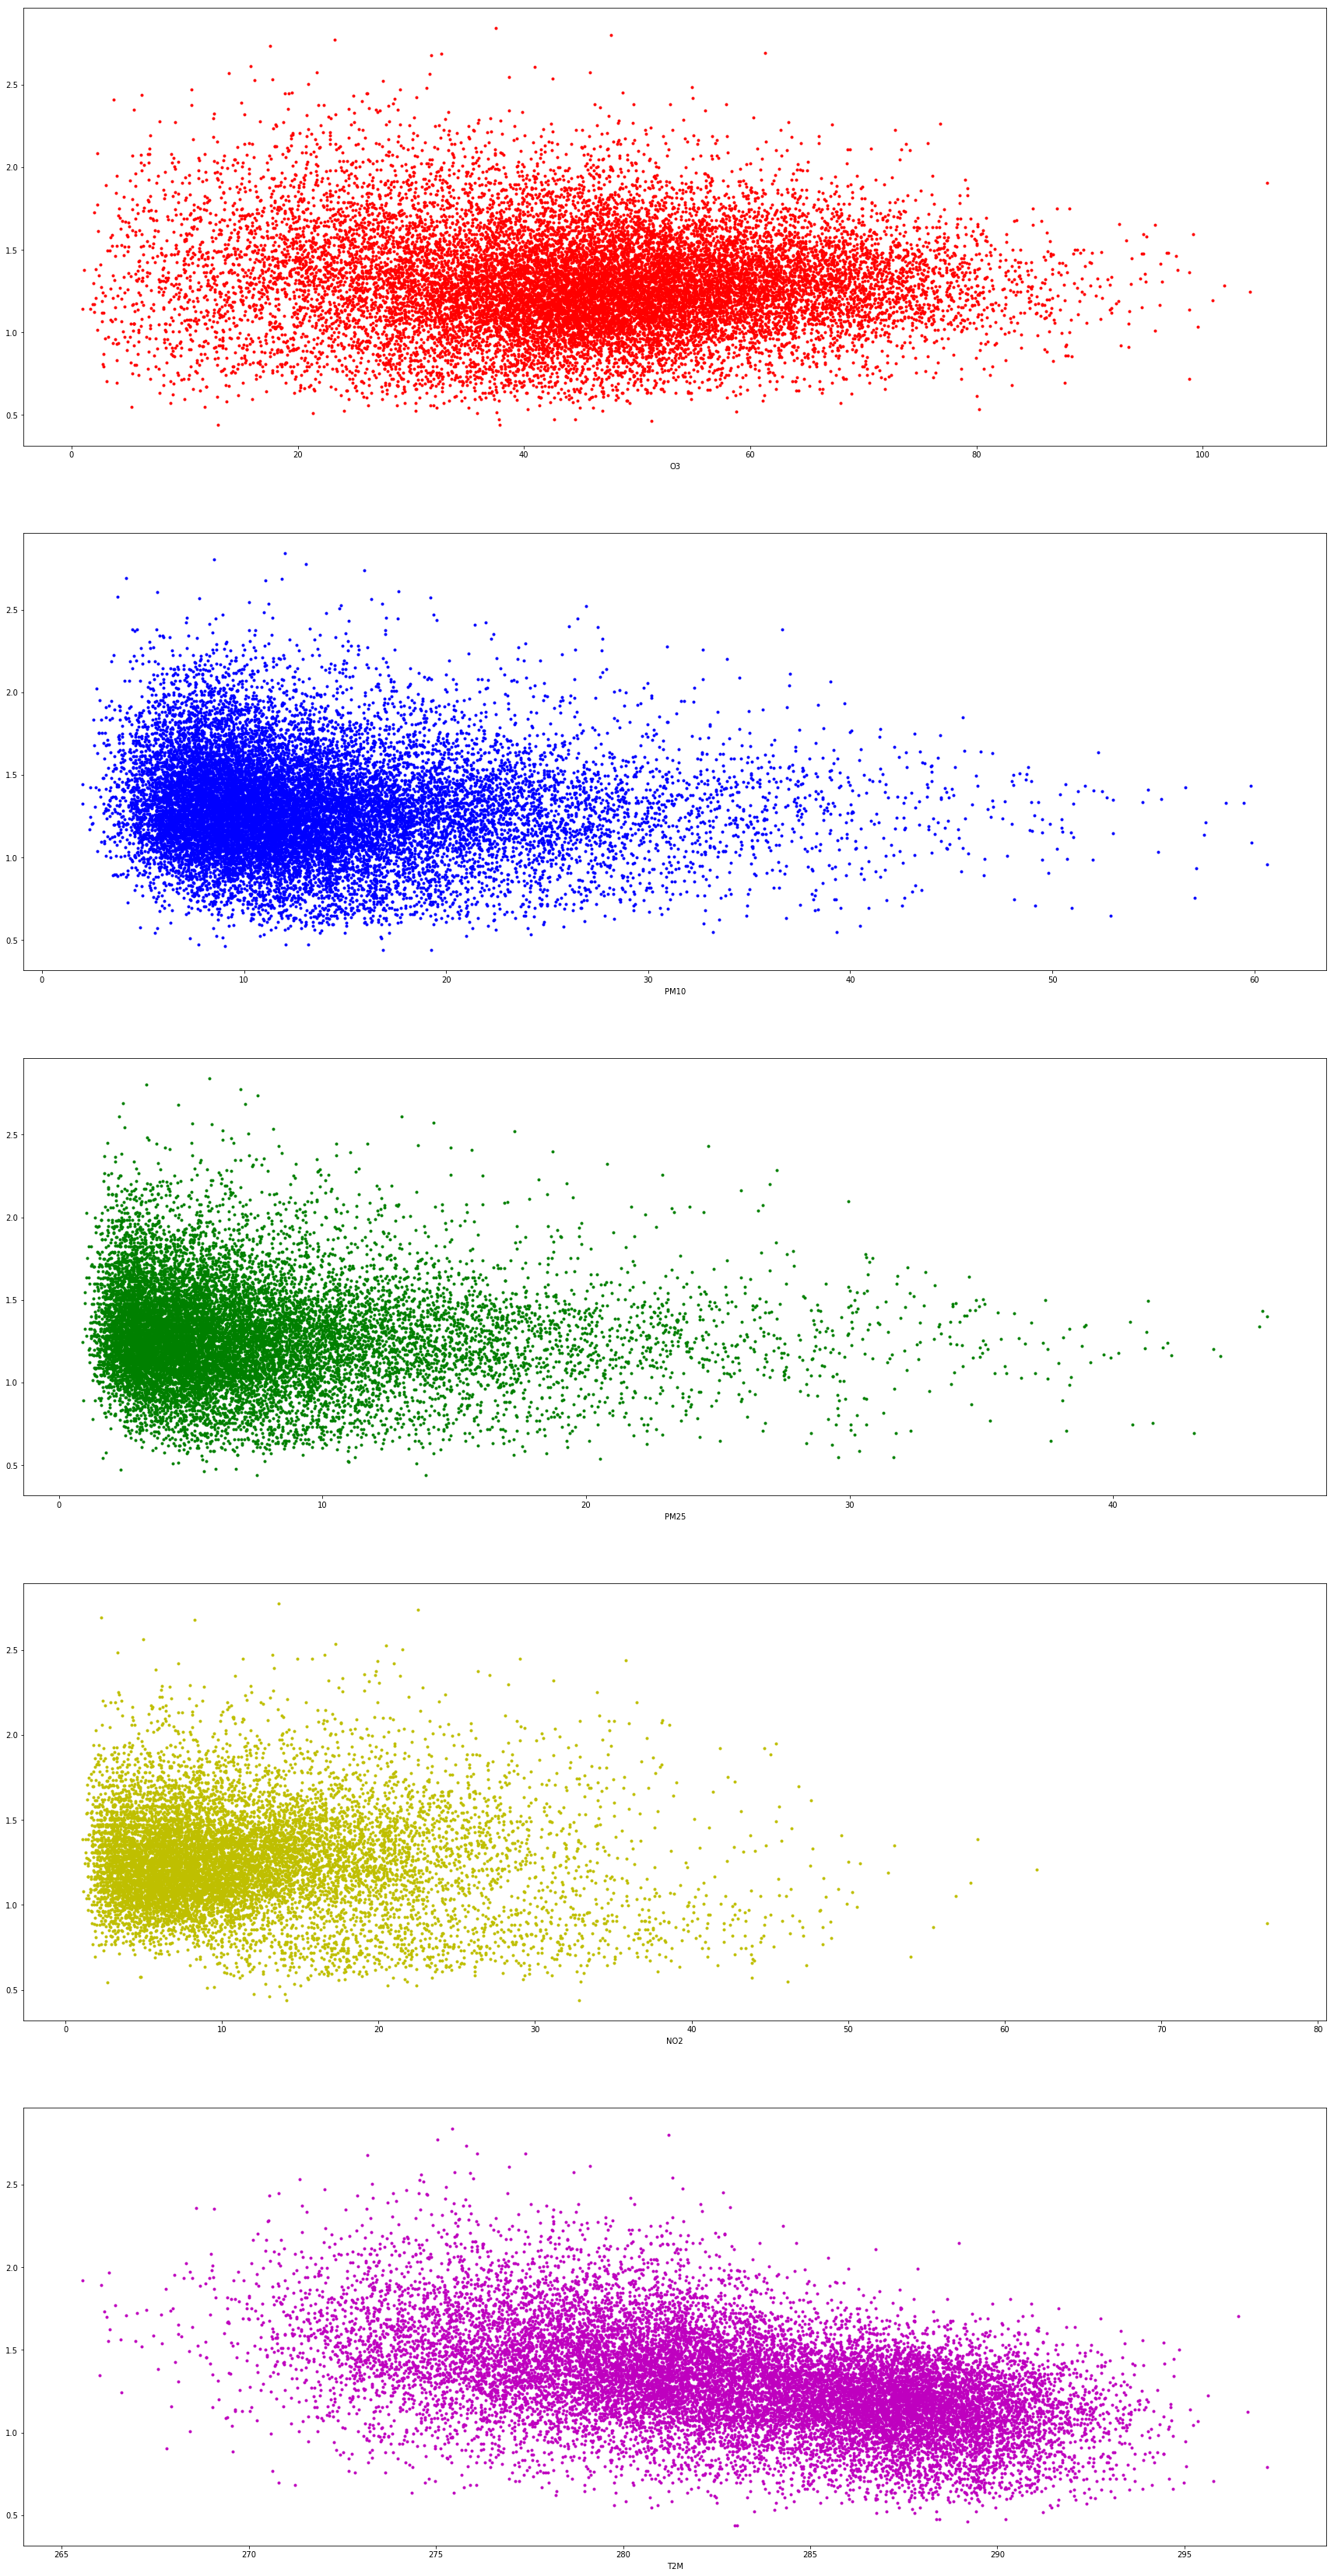

In [28]:
## features in the dataset
features = ['O3', 'PM10', 'PM25', 'NO2', 'T2M']

## colors for plotting
colors = itertools.cycle(["r", "b", "g", "y", "m"])

## creating plot
f = plt.figure()    

## creating subplots
f, axes = plt.subplots(nrows = 5, figsize = (30, 60))

## Mortality Rate versus O3
sc = axes[0].scatter(train[features[0]], train.mortality_rate, marker = '.', color = next(colors))
axes[0].set_xlabel(features[0], labelpad = 5)

## Mortality Rate versus PM10
sc = axes[1].scatter(train[features[1]], train.mortality_rate, marker = '.', color = next(colors))
axes[1].set_xlabel(features[1], labelpad = 5)

## Mortality Rate versus PM2.5
sc = axes[2].scatter(train[features[2]], train.mortality_rate, marker = '.', color = next(colors))
axes[2].set_xlabel(features[2], labelpad = 5)

## Mortality Rate versus NO2
sc = axes[3].scatter(train[features[3]], train.mortality_rate, marker = '.', color = next(colors))
axes[3].set_xlabel(features[3], labelpad = 5)

## Mortality Rate versus mean temperature
sc = axes[4].scatter(train[features[4]], train.mortality_rate, marker = '.', color = next(colors))
axes[4].set_xlabel(features[4], labelpad = 5)

<h2> Pollution level in Mumbai </h2>
<p>We canalyze the pollution levels in Maharashtra. <a href = "https://timesofindia.indiatimes.com/city/mumbai/mumbai-4th-most-polluted-megacity-in-world-9-in-10-people-breathe-bad-air/articleshow/63993044.cms">Mumbai is known to be one of the most polluted cities in the world. </a>. While London has low to moderate pollution levels, Mumbai suffers from very severe pollution</p>

In [32]:
maharashtra = pd.read_csv('maharashtra.csv')
maharashtra.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,165,02-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,16.0,16.0,187.0,NaN
1,165,09-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,23.0,21.0,191.0,NaN
2,165,12-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,25.0,5.0,109.0,NaN
3,165,23-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,155.0,82.0,106.0,NaN
4,165,28-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,19.0,12.0,171.0,NaN


In [100]:
so2 = (maharashtra.groupby('City/Town/Village/Area')['SO2'].mean())
no2 = (maharashtra.groupby('City/Town/Village/Area')['NO2'].mean())
pm10 = (maharashtra.groupby('City/Town/Village/Area')['RSPM/PM10'].mean())
pm25 = (maharashtra.groupby('City/Town/Village/Area')['PM 2.5'].mean())

<h2> Comparing the distribution of pollution for Maharashtra and England 
</h2>
<p> We use ZTest to find if the values belong to the same distribution given by</p>

<img src = "http://homework.uoregon.edu/pub/class/es202/zz.jpg">


In [68]:
'''
Input : 2 distributions (2 pandas series to be compared)
Output : Z-Value (single float)
'''
def ZTest(distribution1 ,distribution2):
    return (np.mean(distribution1) - np.mean(distribution2)) / np.sqrt(np.std(distribution1) ** 2  /  len(distribution1) + np.std(distribution2) ** 2 / len(distribution2))

In [69]:
print(ZTest(maharashtra['NO2'], train['NO2']))

88.56085018235112


The difference is <b> highly significant </b>

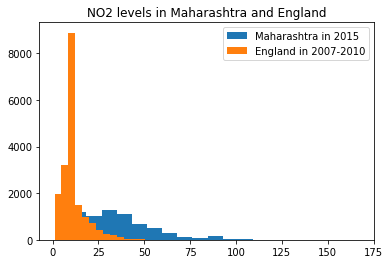

In [107]:
plt.hist(maharashtra['NO2'].fillna(maharashtra['NO2'].mean()), bins = 20, label = 'Maharashtra in 2015')
plt.hist(train['NO2'].fillna(train['NO2'].mean()), bins = 20, label = 'England in 2007-2010')
plt.title('NO2 levels in Maharashtra and England')
plt.legend()

Also we can see from the plot that difference is highly significant, between the 2 distributions.

In [71]:
print(ZTest(maharashtra['RSPM/PM10'], train['PM10']))

150.22312215688228


Again, the difference is highly significant

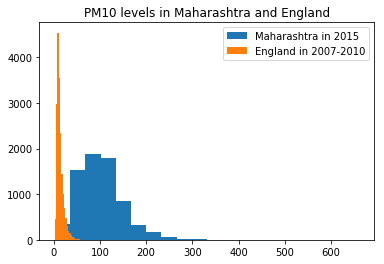

In [59]:
plt.hist(maharashtra['RSPM/PM10'].fillna(maharashtra['RSPM/PM10'].mean()), bins = 20, label = 'Maharashtra in 2015')
plt.hist(train['PM10'].fillna(train['PM10'].mean()), bins = 20, label = 'England in 2007-2010')
plt.title('PM10 levels in Maharashtra and England')
plt.legend()

The plot shows high difference

<h2> Most polluted cities of Maharashtra at higher risk </h2>
<p>We rank the cities according to different pollution parameters (averaged over the entire year) </p>

In [103]:
## SO2 level
print('List of cities by SO2 level:\n', so2.sort_values()[::-1])

List of cities by SO2 level:
 City/Town/Village/Area
Nanded         49.516026
Thane          27.678457
Pune           23.534091
Badlapur       21.414141
Ulhasnagar     21.316770
Kolhapur       20.788779
Dombivli       20.416268
Navi Mumbai    18.046512
Jalgaon        15.681672
Nashik         15.539007
Solapur        13.296117
Aurangabad     12.899654
Amravati       11.890244
Jalna          11.789157
Lote           11.325000
Sangli         11.253247
Nagpur         10.890683
Akola           7.246269
Chandrapur      5.323251
Latur           5.130584
Mumbai          4.203704
Name: SO2, dtype: float64


In [104]:
print('List of cities by NO2 level:\n', no2.sort_values()[::-1])

List of cities by NO2 level:
 City/Town/Village/Area
Thane          58.299035
Pune           56.806818
Ulhasnagar     55.391304
Badlapur       54.858586
Dombivli       53.124402
Nanded         48.166667
Navi Mumbai    42.187835
Sangli         41.327922
Aurangabad     39.916955
Jalgaon        39.016077
Kolhapur       37.749175
Solapur        35.165049
Jalna          30.542169
Nagpur         27.677019
Mumbai         24.697531
Nashik         22.524823
Chandrapur     20.085220
Latur          15.072165
Amravati       13.308943
Lote           11.212500
Akola           8.380597
Name: NO2, dtype: float64


In [106]:
print('List of cities by PM10 level:\n', pm10.sort_values()[::-1])

List of cities by PM10 level:
 City/Town/Village/Area
Nanded         167.080128
Lote           163.250000
Akola          127.190299
Navi Mumbai    125.518784
Jalna          117.684524
Thane          116.919614
Jalgaon        107.938907
Amravati       107.768293
Ulhasnagar     104.981366
Mumbai         104.580247
Badlapur       104.464646
Dombivli       103.555024
Pune           100.507576
Kolhapur        97.085246
Chandrapur      94.039693
Nagpur          82.682324
Aurangabad      82.268041
Latur           78.295533
Nashik          77.489362
Sangli          77.107143
Solapur         74.296117
Name: RSPM/PM10, dtype: float64


<h2> Conclusion </h2>
<p> Maharashtra has significantly high pollution levels as compared to England. In case of England somewhat less correlation is found between mortality rate and pollution parameters. However, same cannot be concluded for Maharashtra as pollution rate is significantly higher in Maharashtra. </p>
<p> Similar data can be collected in the state of Maharashtra to analyse the effect of high pollution on mortality rate and take steps to decrease pollution. This will lead to lower mortality rate and well being of the people.
</p>